# PENGENALAN IMAGE DATA

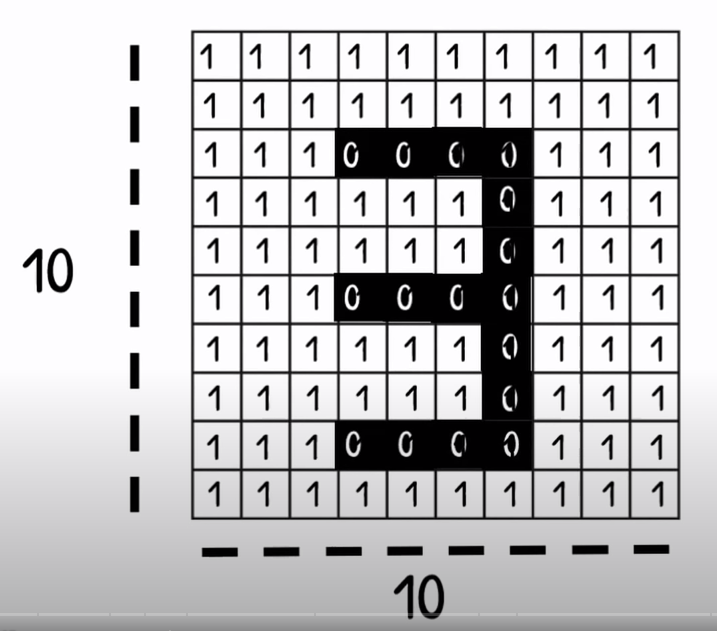


* Untuk membuat judul $\to$ pilih ${\bf Heading}$ seperti gambar dibawah ini
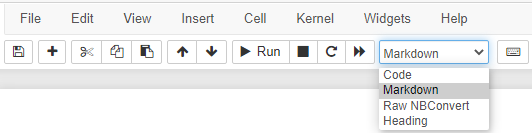

* Sedangkan untuk membuat tulisan $\to$ pilih ${\bf Markdown}$

* Untuk memasukkan gambar pada text langkahnya sebagai berikut :
    * pilih ${\bf Markdown}$ selanjutnya klik ${\bf Edit}$ dan ${\bf Insert Image}$ seperti gambar dibawah ini:
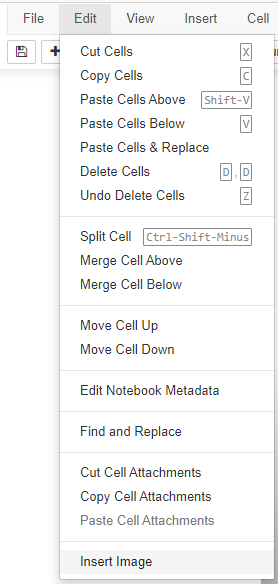
    * sampai muncul perintah :

Beberapa contoh ukuran image dengan pikselnya :
* VGA = 640 $\times$ 480

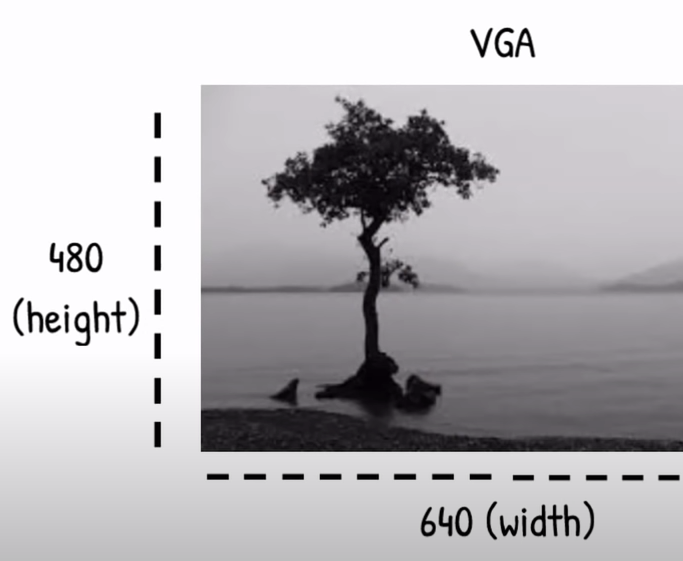

* HD = 1280 $\times$ 720
* Full HD = 1920 $\times$ 1080
* 4K = 3840 $\times$ 2160

Adapun tingkat kecerahan atau yang disebut level pixels (from binary image to grayscale image)
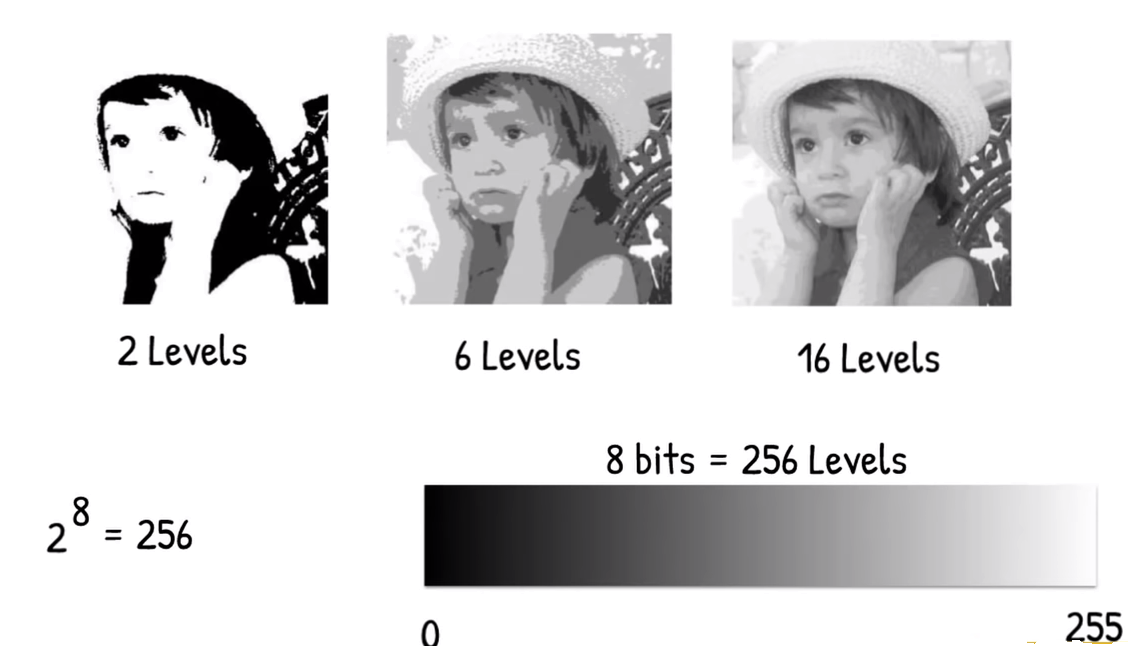

Selanjutnya berkenalan dengan image RGB (Red Green Blue) dimana data yang dimiliki akan memiliki 3 channel yang nantinya berkaitan dengan struktur data tensor $\to$ please referring to tensorflow
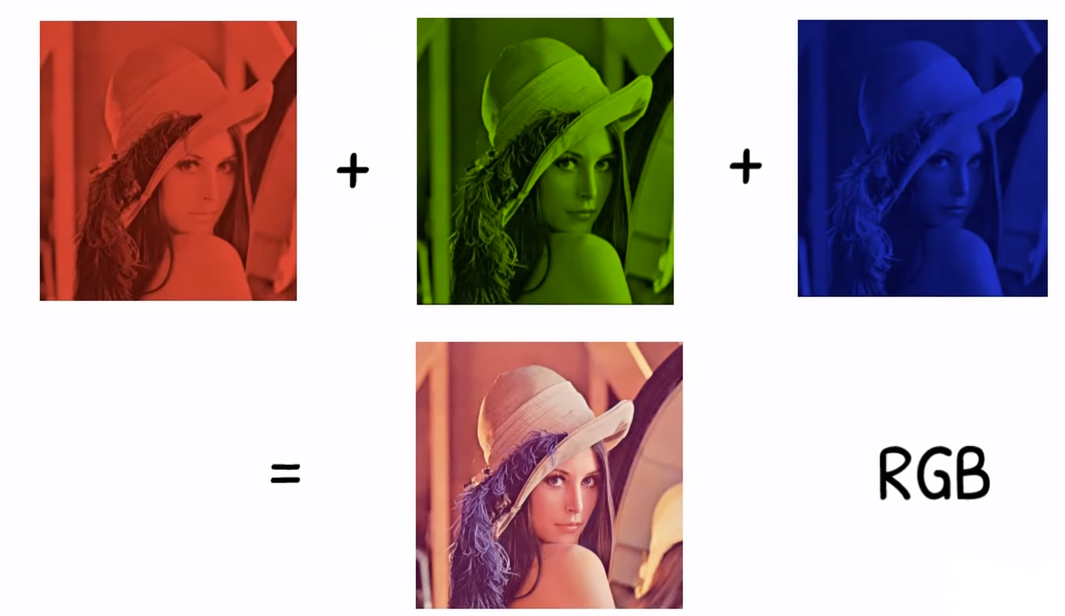

# Lets Start to Play with OpenCV!

##  Import Packages

In [4]:
import cv2

ModuleNotFoundError: No module named 'cv2'

Lhoh?, Tenang saja mari kita install OpenCV package melalui jupyter notebook dengan mengetikkan perintah berikut:

In [5]:
!pip install opencv-python

Sebelum memulai import kembali package cv2

In [3]:
import cv2
import numpy as np

### Mari Membaca Image data Kita!

Catatan : Pastikan Punya Data Image Lho...

In [28]:
fotoKu = cv2.imread("images/fotokaku.jpg")

Untuk menampilkan data image kita lakukan perintah berikut:

In [5]:
cv2.imshow("Fotoku",fotoKu)

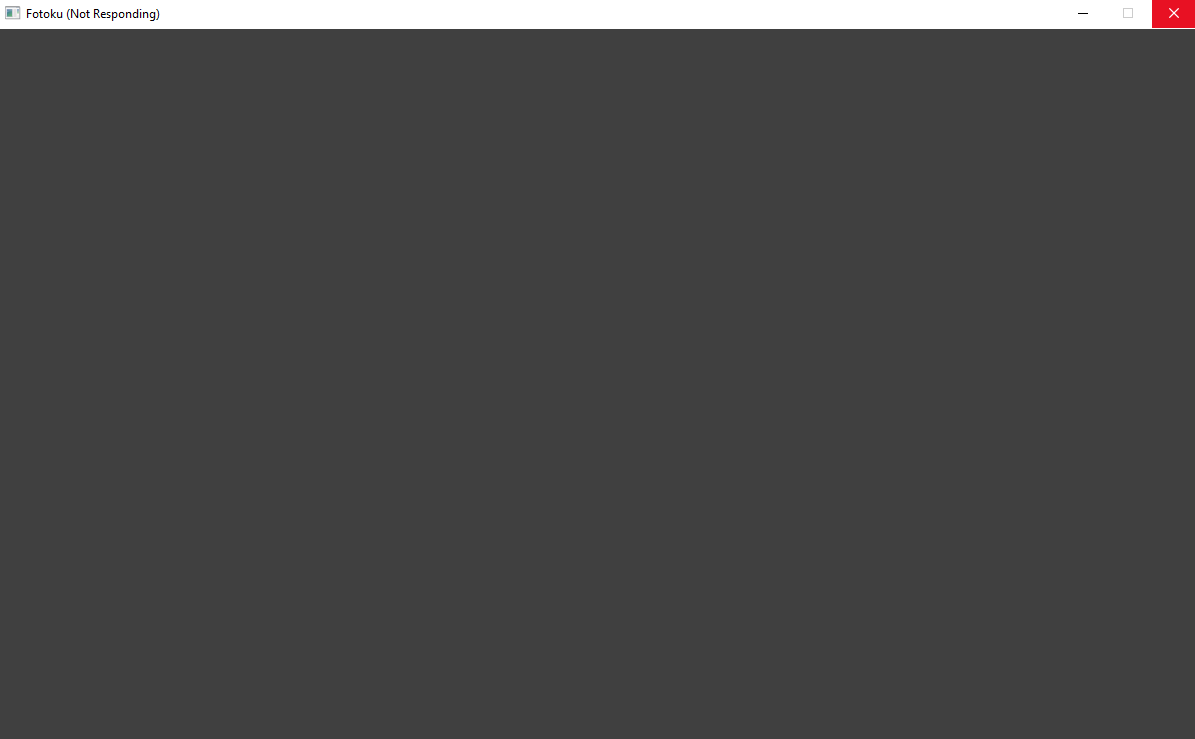
Wait Knapa?, tunggu kita harus mendeklarasikan kunci delay dalam menampilkan image data

In [6]:
cv2.imshow("Fotoku",fotoKu)
cv2.waitKey(0)

-1

Akan muncul pada window lain
untuk memunculkan kedalam jupyter notebook maka perlu bantuan matplotlib sebagai berikut:

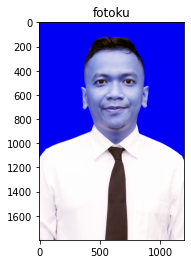

In [6]:
from matplotlib import pyplot as plt

plt.imshow(fotoKu)
plt.title('fotoku')
plt.show()

lho kok? tenang lagi kita perlu melakukan konversi color seperti dibawah ini

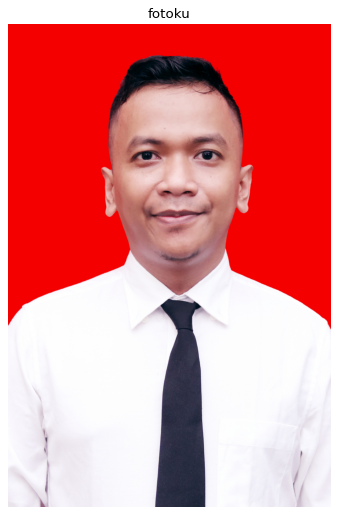

In [8]:
plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(cv2.cvtColor(fotoKu, cv2.COLOR_BGR2RGB))
plt.title('fotoku')
plt.axis('off')
plt.show()

Untuk mengetahui ukuran data image kita bisa dengan perintah berikut:

In [9]:
print(fotoKu.shape)

(1800, 1200, 3)


### Mari membaca video 

In [5]:
videoKu = cv2.VideoCapture('video/baloonfestival.mp4')

# need looping since a video is considered as an image sequence

if videoKu.isOpened()==False :
    print('Tidak Bisa Dibuka')

while videoKu.isOpened():
    status, gbr = videoKu.read()
    if status == True:
        cv2.imshow('videoku', gbr)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

videoKu.release()
cv2.destroyAllWindows()

### Mari mengubah menjadi grayscale image

In [33]:
fotoKu_gray = cv2.cvtColor(fotoKu, cv2.COLOR_BGR2GRAY)
fotoKu_blur = cv2.GaussianBlur(fotoKu_gray, (7,7), 0)
fotoKu_canny = cv2.Canny(fotoKu, 150,200)

kernel = np.ones((5,5), np.uint8)
fotoKu_dilasi = cv2.dilate(fotoKu_canny,kernel,iterations=1)

fotoKu_erosi = cv2.erode(fotoKu_dilasi,kernel,iterations=1)

cv2.imshow('Fotoku Abu2', fotoKu_gray)
cv2.imshow('Blur Fotoku', fotoKu_blur)
cv2.imshow('canny fotoku', fotoKu_canny)
cv2.imshow('Dilatasi Fotoku', fotoKu_dilasi)
cv2.imshow('Erosei Fotoku', fotoKu_erosi)
cv2.waitKey(0)

Text(0.5, 1.0, 'Erosi Fotoku')

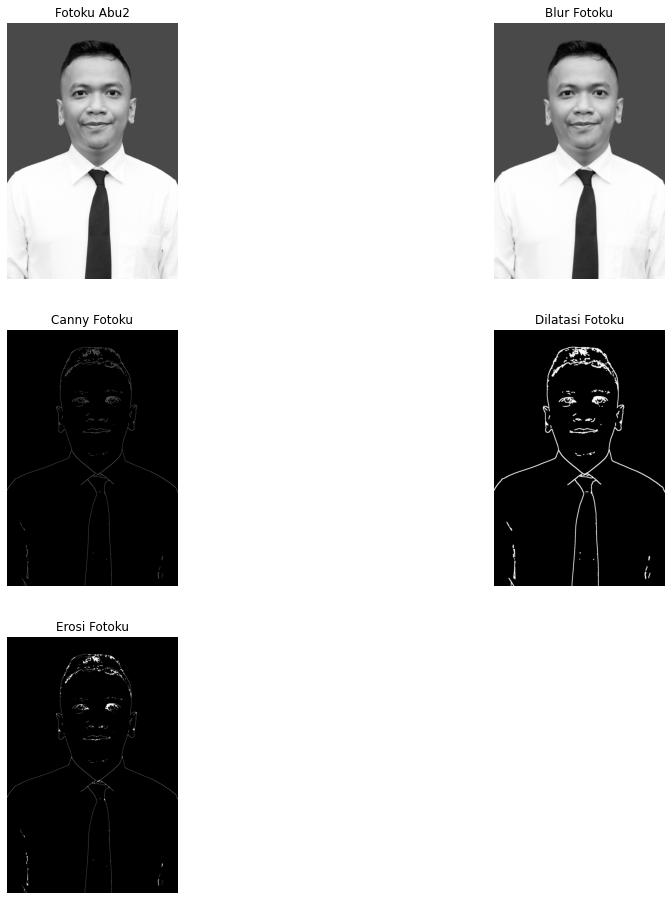

In [34]:
# kita coba menggunakan matplotlib

fig = plt.figure(figsize=(16, 16))

fig.add_subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(fotoKu_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Fotoku Abu2")
  
fig.add_subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(fotoKu_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Blur Fotoku")
  
fig.add_subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(fotoKu_canny, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Canny Fotoku")

fig.add_subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(fotoKu_dilasi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Dilatasi Fotoku")

fig.add_subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(fotoKu_erosi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Erosi Fotoku")

### Resize data Image

In [31]:
# cek size data image asli
print(fotoKu.shape)

# resize data image
fotoKu_resize = cv2.resize(fotoKu,(800, 600))
print(fotoKu_resize.shape)

# cropped image
fotoKu_crop = fotoKu[0:300,300:600]

cv2.imshow('Fotoku Asli', fotoKu)
cv2.imshow('Fotoku Resize', fotoKu_resize)
cv2.imshow('Fotoku crop', fotoKu_crop)
cv2.waitKey(0)

(1800, 1200, 3)
(600, 800, 3)


-1

Text(0.5, 1.0, 'Blur Fotoku')

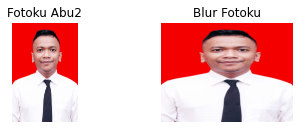

In [24]:
fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(fotoKu, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Fotoku Abu2")
  
fig.add_subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(fotoKu_resize, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Blur Fotoku")

### Menggabungkan dua atau lebih data image

In [29]:
gabungHorizontal = np.hstack((fotoKu, fotoKu))
cv2.imshow('gabung dua image secara horizontal', gabungHorizontal)
cv2.waitKey(0)

-1

In [32]:
gabungVertikal = np.vstack((fotoKu_resize, fotoKu_resize))
cv2.imshow('gabung dua image secara vertikal', gabungVertikal)
cv2.waitKey(0)

-1

### Deteksi warna

In [37]:
fotoKu_hsv = cv2.cvtColor(fotoKu, cv2.COLOR_BGR2HSV)
ghsv = np.hstack((fotoKu, fotoKu_hsv))

cv2.imshow('warna HSV',ghsv)
cv2.waitKey(0)

-1

In [2]:
path = 'images/fotokaku.jpg'
def empty(a):
    pass
cv2.namedWindow('TrackBars')
cv2.resizeWindow('TrackBars',640,240)
cv2.createTrackbar('Hue Min','TrackBars',0,179,empty)
cv2.createTrackbar('Hue Max','TrackBars',179,179,empty)
cv2.createTrackbar('Saturation Min','TrackBars',0,255,empty)
cv2.createTrackbar('Saturation Max','TrackBars',237,255,empty)
cv2.createTrackbar('Value Min','TrackBars',0,255,empty)
cv2.createTrackbar('Value Max','TrackBars',255,255,empty)

while True:
    gbr = cv2.imread(path)
    gbr = cv2.resize(gbr,(300,300))
    gbrhsv = cv2.cvtColor(gbr,cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos('Hue Min','TrackBars')
    h_max = cv2.getTrackbarPos('Hue Max','TrackBars')
    s_min = cv2.getTrackbarPos('Saturation Min','TrackBars')
    s_max = cv2.getTrackbarPos('Saturation Max','TrackBars')
    v_min = cv2.getTrackbarPos('Value Min','TrackBars')
    v_max = cv2.getTrackbarPos('Value Max','TrackBars')
    
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    gbrmask = cv2.inRange(gbrhsv,lower,upper)
    hasilgbr = cv2.bitwise_and(gbr,gbr,mask=gbrmask)
    
    cv2.imshow('original',gbr)
#     cv2.imshow('HSV',gbrhsv)
#     cv2.imshow('Mask',gbrmask)
    cv2.imshow('hasil',hasilgbr)
    cv2.waitKey(1)


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-c2l3r8zm\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'TrackBars' in function 'cvGetTrackbarPos'


### Deteksi Wajah Menggunakan Viola and Jones Algorithm 

https://github.com/opencv/opencv/tree/master/data/haarcascades

In [13]:
wajahcascade = cv2.CascadeClassifier('images/haarcascade_frontalface_default.xml')
gbr = cv2.imread('images/fotokaku.jpg')
gbrgray = cv2.cvtColor(gbr,cv2.COLOR_BGR2GRAY)

wajah = wajahcascade.detectMultiScale(gbrgray)

for (x,y,w,h) in wajah:
    cv2.rectangle(gbr,(x,y),(x+w,y+h),(255,0,0))

cv2.imshow('hasil',gbr)
cv2.waitKey(0)

-1

In [14]:
matacascade = cv2.CascadeClassifier('images/haarcascade_eye.xml')
mata = matacascade.detectMultiScale(gbrgray)

for (x,y,w,h) in mata:
    cv2.rectangle(gbr,(x,y),(x+w,y+h),(255,0,0))

cv2.imshow('hasil',gbr)
cv2.waitKey(0)

-1